# Precipitation Analysis Method: Looking at Snow Shadows and Weather Model Performance in the Uinta Basin

## Overview

This analysis looks at two main questions for our Uinta Basin winter ozone study: (1) Can we actually see a snow shadow effect in the data? and (2) How well does the RTMA weather model work in this area? We compared real precipitation measurements from weather stations with what the RTMA model predicted during a winter storm from December 28, 2024 to January 3, 2025.

## What We're Studying

**Our Main Questions:**

1. **Snow Shadow**: Is there really a snow shadow in the Uinta Basin? We should see less precipitation on the east side of the Wasatch Mountains compared to the west side.

2. **Model Performance**: How good is RTMA at predicting precipitation in this area? This matters because weather models are used for forecasting, and we want to know if we can trust them.

**Why This Matters**: Both questions help us understand winter ozone problems in the Uinta Basin. Snow patterns affect how cold air gets trapped and how ozone forms. If weather models don't work well here, that could be a problem for predicting air quality.

## The Data Sources

### Real Weather Stations
- **Source**: Weather stations across Utah using SynopticPy to get the data
- **What it measures**: Actual hourly precipitation from rain gauges and snow sensors
- **Time period**: December 28, 2024 to January 3, 2025
- **Why it's important**: This is what actually happened - the "ground truth"

### RTMA Weather Model
- **Source**: RTMA (Real-Time Mesoscale Analysis) using the Herbie library
- **What it provides**: Computer model predictions of precipitation on a 2.5km grid
- **Resolution**: Hourly predictions that we matched to station locations
- **Why we're testing it**: RTMA is used for weather forecasting, so we want to know how accurate it is in our study area

## About RTMA

**What is RTMA?**
RTMA is a weather analysis system that runs every hour to provide current weather conditions across the United States. It combines computer model forecasts with real observations from weather stations to create maps of temperature, precipitation, wind, and other weather variables.

**What products are available?**
RTMA produces several weather variables, but the most useful ones for our study are:
- **Precipitation analysis** - hourly amounts of rain and snow
- **Temperature and dewpoint** - surface conditions that affect snow accumulation
- **Wind analysis** - important for understanding storm patterns
- **Surface pressure** - helps understand weather patterns

For our snow shadow research, the precipitation analysis is the most important product.

**How is RTMA created?**
RTMA starts with forecasts from other weather models (like HRRR and NAM) and then adjusts these forecasts using real observations from weather stations, airports, and other sensors. It uses a mathematical technique called "2-dimensional variational analysis" to blend the model forecasts with the observations and create the best estimate of current conditions on a 2.5km grid.

**What are the pros and cons?**
*Pros:*
- **Real-time availability**: Updates every hour, so it's current
- **High resolution**: 2.5km grid provides detailed spatial information
- **Combines multiple data sources**: Uses both models and observations
- **Widely used**: Standard product for weather forecasting

*Cons:*
- **Complex terrain challenges**: May struggle in mountainous areas like ours
- **Limited by observations**: Accuracy depends on having good weather station coverage
- **Model limitations**: Still relies on underlying weather model forecasts that may have biases
- **Short latency**: 55-minute delay means some observations might be missed

## How We Organized the Weather Stations

We divided weather stations into four groups based on where they sit relative to the mountains. This helps us see if there's really a snow shadow pattern:

### 1. Windward Stations (West Side)
- **Location**: West side of the Wasatch Mountains where storms hit first
- **Stations**: KSLC (Salt Lake City), KPVU (Provo), KSVR (South Valley)
- **What we expect**: More precipitation because air gets pushed up and cooled

### 2. Mountain Stations (High Up)
- **Location**: High up in the Wasatch Mountains
- **Stations**: CLN (Alta Collins), ATB (Alta Base), SPC (Snowbird)
- **What we expect**: Most precipitation because of the altitude and mountain effects

### 3. Transition Stations (Middle)
- **Location**: Eastern slopes heading toward the Uinta Basin
- **Stations**: HANU1, BSHU1, TADU1
- **What we expect**: Less precipitation as air starts descending

### 4. Leeward Stations (East Side - Uinta Basin)
- **Location**: Eastern Utah in the Uinta Basin
- **Stations**: LRFU1, A1388, KVEL (Vernal)
- **What we expect**: Least precipitation due to snow shadow effects

## The Method

### Why RTMA Evaluation Matters for Uinta Basin Research

RTMA is widely used for operational weather forecasting and provides meteorological inputs for air quality models. In the Uinta Basin, where winter ozone episodes depend on specific meteorological conditions (including snow cover, temperature inversions, and wind patterns), understanding RTMA's limitations is crucial for:

- **Operational air quality forecasting**: Poor precipitation forecasts could lead to incorrect snow depth predictions, affecting surface energy balance calculations
- **Research model validation**: Any ozone formation models using RTMA inputs need to account for systematic biases
- **Data sparse region**: The Uinta Basin has limited observational coverage, making model accuracy even more critical for filling data gaps

### Data Collection Process
1. **Gather station data**: Use the Synoptic API to download hourly precipitation measurements from all stations
2. **Retrieve model data**: Use Herbie to download RTMA precipitation grids for the same time period
3. **Extract model values**: For each station location, find the nearest model grid point and extract predicted precipitation
4. **Aggregate to daily totals**: Sum up hourly values to get daily precipitation amounts for both observed and modeled data

### Analysis Approach
1. **Snow shadow documentation**: Compare precipitation amounts across the terrain gradient to identify the expected west-east precipitation decrease characteristic of orographic precipitation shadows
2. **RTMA performance assessment**: Evaluate systematic biases and accuracy of RTMA precipitation forecasts across different terrain types in the Uinta Basin
3. **Terrain-dependent model evaluation**: Assess how RTMA performance varies from windward to leeward locations, identifying where the model struggles most
4. **Operational implications**: Document model limitations that could affect winter air quality forecasting and meteorological input reliability for ozone prediction systems

## Key Findings from This Run

### Windward Terrain
- **Observations**: Major precipitation events on Dec 28 (up to 41mm at KPVU) and Dec 29 (33mm at KSLC)
- **RTMA Performance**: Significantly underestimated precipitation amounts
- **Example bias**: KPVU showed 43.7mm observed vs 1.3mm modeled (42.3mm underestimate)

### Mountain Terrain
- **Observations**: High variability between stations; CLN (high elevation) recorded much more than ATB (lower elevation)
- **RTMA Performance**: Mixed results - sometimes overestimated when no precipitation occurred
- **Pattern**: Model showed precipitation when observations were zero, suggesting timing or spatial issues

### Transition and Leeward Terrain
- **Observations**: Generally low precipitation amounts, consistent with rain shadow effects
- **RTMA Performance**: Model predicted mostly zero precipitation, which matched observations fairly well
- **Note**: These areas saw limited precipitation during this particular storm period

## Technical Implementation

### Tools We Used
- **Python** for processing data and making calculations
- **SynopticPy** for downloading weather station data
- **Herbie library** for getting RTMA model data
- **Polars** for organizing and analyzing the data efficiently
- **Matplotlib** for creating plots and graphs

### Data Processing Steps
1. **Get station data**: Downloaded hourly precipitation measurements from all the weather stations
2. **Get model data**: Downloaded RTMA predictions for the same time period and locations
3. **Match them up**: Made sure the model and station data were for the same times and places
4. **Add up daily totals**: Combined hourly amounts to get daily precipitation for easier comparison
5. **Make comparisons**: Calculated how different the model predictions were from what actually happened

## What We Found

We found some interesting initial results that help answer both of our research questions.

**Snow Shadow Pattern:**
We found evidence supporting a snow shadow effect during this storm period. Stations on the west side of the mountains recorded 43.7-90.1mm of precipitation, while stations in the Uinta Basin (east side) only got 0-4.1mm. This matches what we expected to see and supports what people have assumed about the snow shadow effect, though more analysis of additional storm events would strengthen this finding.

**RTMA Model Performance:**
RTMA had some problems predicting precipitation in this area during this storm. It significantly underestimated how much precipitation fell on the west side (for example, it predicted only 1.3mm at KPVU when 43.7mm actually fell - that's a 42.3mm error!). However, it did reasonably well predicting the low amounts on the east side.

**What This Means:**
The precipitation pattern we documented during this storm period is consistent with snow shadow effects and helps us understand how snow might get distributed across the area. Areas with different snow amounts will have different temperatures and atmospheric conditions, which could affect ozone formation.

The RTMA issues we found suggest the model may have limitations in mountainous terrain, at least during this type of storm event.

**Why This Matters:**
This analysis provides initial evidence for the Uinta Basin snow shadow effect using actual measurements from a winter storm. While this is just one storm period and more analysis would be needed for stronger conclusions, it's a good starting point that supports what people have long assumed was happening. We also identified some potential limitations with RTMA that could be important for future weather forecasting and air quality research in this area.

=== GETTING OBSERVATIONAL DATA ===
Processing windward terrain...
  Stations: KSLC,KPVU,KSVR
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.23 seconds).
  Retrieved 4159 rows
  Daily aggregated: 20 rows
Processing mountain terrain...
  Stations: CLN,ELBUT,SPC
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.16 seconds).
  Retrieved 145 rows
  Daily aggregated: 7 rows
Processing transition terrain...
  Stations: HANU1,BSHU1,TADU1
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.18 seconds).
  Retrieved 2841 rows
  Daily aggregated: 21 rows
Processing leeward terrain...
  Stations: LRFU1,A1388,KVEL
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.18 seconds).
  Retrieved 2206 rows
  Daily aggregated: 21 rows

=== GETTING RTMA DATA ===
Getting RTMA data from 2024-12-28 to 2025-01-03
Processing 145 hours...
✅ Found ┊ model=rtm

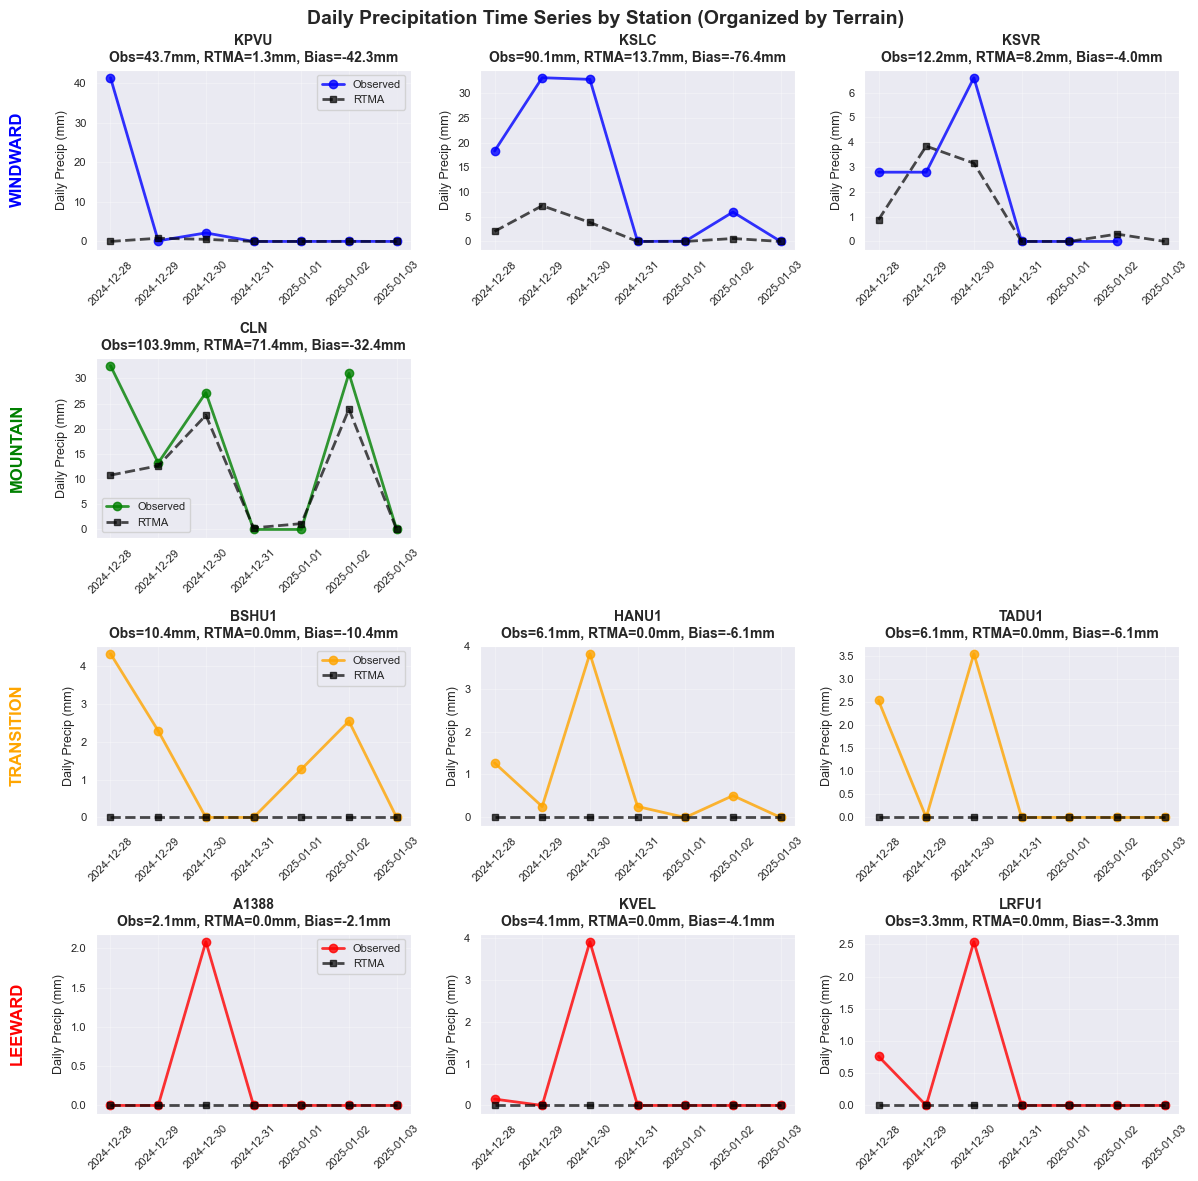

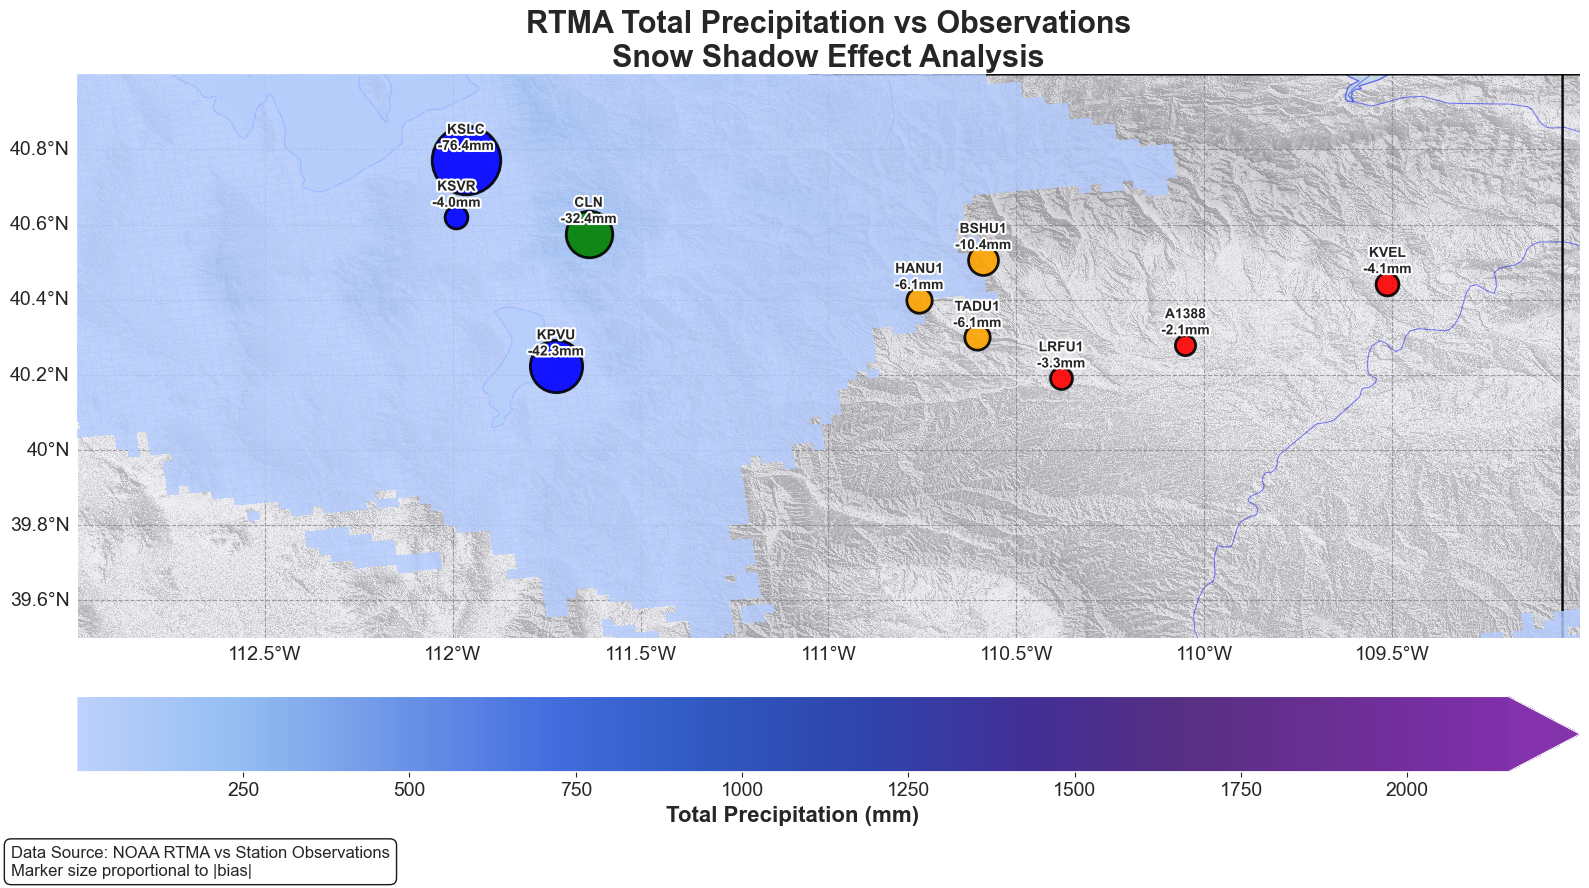

In [4]:
from datetime import datetime, timedelta
from synoptic.services import TimeSeries
import polars as pl
import matplotlib.pyplot as plt
from herbie import Herbie
import numpy as np
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patheffects as patheffects
from matplotlib.colors import LinearSegmentedColormap
import rasterio
import warnings

warnings.filterwarnings("ignore")

TERRAIN_STATIONS = {
    'windward': {
        'KSLC': (40.77069, -111.96503),
        'KPVU': (40.22390, -111.72530),
        'KSVR': (40.61960, -111.99016)
    },
    'mountain': {
        'CLN': (40.5763, -111.6383),
        'ATB': (40.589, -111.637),
        'SPC': (40.641, -111.636)
    },
    'transition': {
        'HANU1': (40.40056, -110.75861),
        'BSHU1': (40.50694, -110.58833),
        'TADU1': (40.29972, -110.60417)
    },
    'leeward': {
        'LRFU1': (40.19190, -110.38099),
        'A1388': (40.28, -110.05),
        'KVEL': (40.44295, -109.51273)
    }
}

ALL_STATIONS = {}
STATION_TERRAIN = {}
for terrain, stations in TERRAIN_STATIONS.items():
    for stid, coords in stations.items():
        ALL_STATIONS[stid] = coords
        STATION_TERRAIN[stid] = terrain


def get_terrain_precip_data(start_date: str, end_date: str):
    """Get daily precipitation totals by terrain type from observations."""
    results = {}

    for terrain_type, stations in TERRAIN_STATIONS.items():
        print(f"Processing {terrain_type} terrain...")

        station_ids = ",".join(stations.keys())
        print(f"  Stations: {station_ids}")

        ts = TimeSeries(
            stid=station_ids,
            start=start_date,
            end=end_date,
            vars="precip_accum_one_hour",
            token=""
        )

        df = ts.df()
        print(f"  Retrieved {len(df)} rows")

        daily_df = (df
                    .with_columns([
            pl.col("date_time").dt.date().alias("date")
        ])
                    .group_by(["date", "stid"])
                    .agg([
            pl.col("value").sum().alias("daily_precip_mm"),
            pl.col("latitude").first(),
            pl.col("longitude").first(),
            pl.col("name").first(),
            pl.col("elevation").first()
        ])
                    .sort(["date", "stid"])
                    )

        print(f"  Daily aggregated: {len(daily_df)} rows")
        results[terrain_type] = daily_df

    return results


def get_rtma_precip_data(start_date: str, end_date: str):
    """Get daily RTMA precipitation totals by terrain type using Herbie pick_points."""
    import pandas as pd

    results = {}
    rtma_grids = []  # Store full grids for mapping

    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")

    print(f"Getting RTMA data from {start_date} to {end_date}")

    current_time = start
    all_times = []
    while current_time <= end:
        all_times.append(current_time)
        current_time += timedelta(hours=1)

    print(f"Processing {len(all_times)} hours...")

    # Store accumulated data for each day
    daily_accumulations = {}

    for current_time in all_times:
        time_str = current_time.strftime("%Y-%m-%d %H:%M")
        date_key = current_time.date()

        H = Herbie(time_str, model="rtma", product="pcp", fxx=0)
        file_path = H.download()

        precip_result = H.xarray()

        if isinstance(precip_result, list):
            precip_ds = precip_result[0]
            precip_var = list(precip_ds.data_vars)[0]
        else:
            precip_ds = precip_result
            precip_var = list(precip_ds.data_vars)[0]

        # Convert longitude if needed
        if precip_ds.longitude.min() > 180:
            precip_ds = precip_ds.assign_coords(
                longitude=(((precip_ds.longitude + 180) % 360) - 180)
            )

        # Accumulate by day
        if date_key not in daily_accumulations:
            daily_accumulations[date_key] = precip_ds[precip_var].copy()
        else:
            daily_accumulations[date_key] = daily_accumulations[date_key] + precip_ds[precip_var]

        if current_time.hour == 0:
            print(f"  Completed {current_time.strftime('%Y-%m-%d')}")

    # Create a comprehensive points DataFrame with all stations
    all_points = []
    for terrain_type, stations in TERRAIN_STATIONS.items():
        for station_id, (station_lat, station_lon) in stations.items():
            all_points.append({
                'stid': station_id,
                'latitude': station_lat,
                'longitude': station_lon,
                'terrain': terrain_type
            })

    points_df = pd.DataFrame(all_points)

    # Process each day's accumulated data
    all_daily_data = []

    for date_key, daily_precip_array in daily_accumulations.items():
        # Store the grid for mapping (only need one per day)
        rtma_grids.append({
            'date': date_key,
            'data': daily_precip_array,
            'lat_coord': 'latitude',
            'lon_coord': 'longitude'
        })

        # Convert DataArray to Dataset for herbie accessor
        daily_dataset = daily_precip_array.to_dataset(name='precipitation')

        # Use pick_points with tree caching for efficiency
        picked_data = daily_dataset.herbie.pick_points(
            points_df[['latitude', 'longitude', 'stid']],
            method='nearest',
            tree_name=f'rtma_{daily_precip_array.sizes["y"]}_{daily_precip_array.sizes["x"]}'
        )

        # Extract the precipitation values
        precip_values = picked_data['precipitation'].values

        # Create records for this day
        for i, (_, row) in enumerate(points_df.iterrows()):
            all_daily_data.append({
                'stid': row['stid'],
                'date': date_key,
                'daily_precip_mm': float(precip_values[i]),
                'latitude': row['latitude'],
                'longitude': row['longitude'],
                'name': f'RTMA_{row["stid"]}',
                'elevation': 0.0,
                'terrain': row['terrain']
            })

    # Convert to DataFrame and group by terrain
    if all_daily_data:
        full_df = pd.DataFrame(all_daily_data)

        # Group by terrain type and convert to polars DataFrames
        for terrain_type in TERRAIN_STATIONS.keys():
            terrain_data = full_df[full_df['terrain'] == terrain_type].drop(columns=['terrain'])
            if len(terrain_data) > 0:
                daily_df = pl.from_pandas(terrain_data).sort(["date", "stid"])
                print(f"  {terrain_type} RTMA aggregated: {len(daily_df)} daily records")
                results[terrain_type] = daily_df
            else:
                results[terrain_type] = None

    return results, rtma_grids


def create_station_time_series_plots(obs_data, rtma_data, output_dir="./plots"):
    """Create individual time series plots for each station, organized by terrain type."""

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    terrain_colors = {
        'windward': 'blue',
        'mountain': 'green',
        'transition': 'orange',
        'leeward': 'red'
    }

    stations_by_terrain = {}
    for terrain in TERRAIN_STATIONS.keys():
        stations_by_terrain[terrain] = []
        if obs_data[terrain] is not None:
            stations_in_terrain = obs_data[terrain]['stid'].unique().to_list()
            stations_by_terrain[terrain] = sorted(stations_in_terrain)

    n_rows = len([t for t in TERRAIN_STATIONS.keys() if len(stations_by_terrain[t]) > 0])
    max_stations_per_terrain = max(len(stations) for stations in stations_by_terrain.values())
    n_cols = max_stations_per_terrain

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), squeeze=False)

    terrain_row = 0

    for terrain in ['windward', 'mountain', 'transition', 'leeward']:
        if len(stations_by_terrain[terrain]) == 0:
            continue

        stations = stations_by_terrain[terrain]

        for col, station in enumerate(stations):
            ax = axes[terrain_row, col]

            station_obs_data = None
            station_rtma_data = None

            if obs_data[terrain] is not None:
                station_obs_data = obs_data[terrain].filter(pl.col('stid') == station)

            if rtma_data[terrain] is not None:
                station_rtma_data = rtma_data[terrain].filter(pl.col('stid') == station)

            if station_obs_data is not None and station_rtma_data is not None and len(station_obs_data) > 0 and len(
                    station_rtma_data) > 0:
                obs_pd = station_obs_data.to_pandas()
                rtma_pd = station_rtma_data.to_pandas()

                ax.plot(obs_pd['date'], obs_pd['daily_precip_mm'],
                        'o-', color=terrain_colors[terrain],
                        label='Observed', alpha=0.8, markersize=6, linewidth=2)

                ax.plot(rtma_pd['date'], rtma_pd['daily_precip_mm'],
                        's--', color='black', label='RTMA',
                        alpha=0.7, markersize=5, linewidth=2)

                obs_total = obs_pd['daily_precip_mm'].sum()
                rtma_total = rtma_pd['daily_precip_mm'].sum()
                bias = rtma_total - obs_total

                ax.set_title(f'{station}\nObs={obs_total:.1f}mm, RTMA={rtma_total:.1f}mm, Bias={bias:.1f}mm',
                             fontsize=10, fontweight='bold')
            else:
                ax.set_title(f'{station}\nNo Data Available', fontsize=10)

            ax.set_ylabel('Daily Precip (mm)', fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='x', rotation=45, labelsize=8)
            ax.tick_params(axis='y', labelsize=8)

            if col == 0:
                ax.legend(fontsize=8)

        for col in range(len(stations), n_cols):
            axes[terrain_row, col].set_visible(False)

        axes[terrain_row, 0].text(-0.25, 0.5, f'{terrain.upper()}',
                                  transform=axes[terrain_row, 0].transAxes,
                                  rotation=90, va='center', ha='center',
                                  fontsize=12, fontweight='bold',
                                  color=terrain_colors[terrain])

        terrain_row += 1

    plt.suptitle('Daily Precipitation Time Series by Station (Organized by Terrain)', fontsize=14, fontweight='bold')
    plt.tight_layout()

    output_file = os.path.join(output_dir, "station_time_series_by_terrain.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Station time series plot saved: {output_file}")

    return fig, output_file


def load_dem(dem_file, lon_min, lon_max, lat_min, lat_max):
    """Load DEM data for terrain visualization."""
    with rasterio.open(dem_file) as src:
        dem = src.read(1)
        transform = src.transform
        height, width = dem.shape
        lon = np.linspace(transform.c, transform.c + width * transform.a, width)
        lat = np.linspace(transform.f, transform.f + height * transform.e, height)

        if lon.min() > 180:
            lon = (lon + 180) % 360 - 180

        return dem, lon, lat


def create_hillshade(dem, azimuth=315, altitude=45):
    """Create hillshade from DEM for terrain visualization."""
    dem_copy = dem.copy()
    if np.any(np.isnan(dem_copy)):
        dem_copy[np.isnan(dem_copy)] = np.nanmean(dem_copy)

    azimuth = 360.0 - azimuth
    azimuth_rad = azimuth * np.pi / 180.0
    altitude_rad = altitude * np.pi / 180.0

    x, y = np.gradient(dem_copy)
    slope = np.pi / 2 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)

    hillshade = np.sin(altitude_rad) * np.sin(slope) + \
                np.cos(altitude_rad) * np.cos(slope) * \
                np.cos(azimuth_rad - aspect)

    return (hillshade + 1) / 2


def prepare_comparison_data_for_mapping(obs_data, rtma_data):
    """Prepare comparison data for mapping."""
    comparison_rows = []

    for terrain in TERRAIN_STATIONS.keys():
        if obs_data.get(terrain) is not None and rtma_data.get(terrain) is not None:
            obs_df = obs_data[terrain]
            rtma_df = rtma_data[terrain]

            obs_totals = obs_df.group_by('stid').agg([
                pl.sum('daily_precip_mm').alias('obs_precip_mm')
            ])

            rtma_totals = rtma_df.group_by('stid').agg([
                pl.sum('daily_precip_mm').alias('rtma_precip_mm')
            ])

            combined = obs_totals.join(rtma_totals, on='stid', how='inner')

            combined = combined.with_columns([
                pl.lit(terrain).alias('terrain'),
                (pl.col('rtma_precip_mm') - pl.col('obs_precip_mm')).alias('bias')
            ])

            for row in combined.iter_rows(named=True):
                comparison_rows.append(row)

    return pl.DataFrame(comparison_rows)


def create_snow_shadow_map(rtma_grids, comparison_df, dem_file, output_dir, bbox, title_suffix=""):
    """Create snow shadow visualization map."""

    if not rtma_grids:
        print("No RTMA grid data provided")
        return False, None, None

    lat_min, lon_min, lat_max, lon_max = bbox

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Sum all daily grids for total precipitation
    total_grid = None
    for grid_info in rtma_grids:
        if total_grid is None:
            total_grid = grid_info['data'].copy()
        else:
            total_grid = total_grid + grid_info['data']

    output_file = os.path.join(output_dir, "snow_shadow_analysis.png")

    projection = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={'projection': projection})
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=projection)

    # Load and display DEM/terrain
    dem, dem_lons, dem_lats = load_dem(dem_file, lon_min, lon_max, lat_min, lat_max)
    hillshade = create_hillshade(dem)
    ax.pcolormesh(dem_lons, dem_lats, hillshade, cmap='gray', alpha=0.3,
                  transform=projection, zorder=1, shading='auto')
    ax.pcolormesh(dem_lons, dem_lats, dem, cmap='Greys', alpha=0.15,
                  transform=projection, zorder=2, shading='auto')

    # Add geographic features
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor="black", linewidth=1.5,
                   facecolor="none", alpha=0.8, zorder=7)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='blue', facecolor='lightblue', alpha=0.6)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.7, alpha=0.6)

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}

    # Create custom colormap for precipitation
    blue_purple = [(0.7, 0.8, 1.0), (0.5, 0.7, 0.95), (0.3, 0.5, 0.9), (0.1, 0.3, 0.85),
                   (0.0, 0.2, 0.7), (0.0, 0.1, 0.6), (0.1, 0.0, 0.5), (0.2, 0.0, 0.4),
                   (0.3, 0.0, 0.5), (0.4, 0.0, 0.6)]
    precip_cmap = LinearSegmentedColormap.from_list('precip_blue_purple', blue_purple)
    precip_cmap.set_under('brown')

    # Plot RTMA precipitation data
    vmin = 0.01
    max_val = float(total_grid.max().values)
    vmax = max(5.0, max_val * 1.1)
    masked_data = total_grid.where(total_grid > vmin)

    p = ax.pcolormesh(total_grid.longitude, total_grid.latitude, masked_data,
                      transform=projection, cmap=precip_cmap, vmin=vmin, vmax=vmax,
                      alpha=0.8, zorder=8, shading='auto')

    # Plot stations with bias information
    terrain_colors = {
        'windward': 'blue',
        'mountain': 'green',
        'transition': 'orange',
        'leeward': 'red'
    }

    for row in comparison_df.iter_rows(named=True):
        stid = row['stid']
        bias = row['bias']
        terrain = row['terrain']

        station_lat, station_lon = ALL_STATIONS[stid]

        marker_size = 150 + abs(bias) * 30

        ax.scatter(station_lon, station_lat, c=terrain_colors[terrain], s=marker_size,
                   edgecolors='black', linewidth=2, alpha=0.9, zorder=15)

        ax.text(station_lon, station_lat + 0.02, f'{stid}\n{bias:.1f}mm',
                transform=projection, ha='center', va='bottom', fontsize=10, fontweight='bold',
                path_effects=[patheffects.withStroke(linewidth=3, foreground='white')], zorder=16)

    # Add colorbar
    cbar = plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, extend='max')
    cbar.set_label("Total Precipitation (mm)", fontsize=16, fontweight='bold')
    cbar.ax.tick_params(labelsize=14)

    # Set title
    title = f"RTMA Total Precipitation vs Observations\nSnow Shadow Effect Analysis{title_suffix}"
    ax.set_title(title, fontsize=22, fontweight='bold')

    # Add data source annotation
    plt.figtext(0.01, 0.01,
                "Data Source: NOAA RTMA vs Station Observations\nMarker size proportional to |bias|",
                fontsize=12, bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.9))

    # Save the plot
    plt.savefig(output_file, dpi=600, bbox_inches="tight")
    plt.tight_layout()

    return True, fig, output_file



if __name__ == "__main__":
    # Get observational data
    obs_data = get_terrain_precip_data("2024-12-28", "2025-01-03")

    rtma_data, rtma_grids = get_rtma_precip_data("2024-12-28", "2025-01-03")
    # Print summary of data
    for terrain in TERRAIN_STATIONS.keys():
        print(f"\n{terrain.upper()} terrain:")
        if obs_data[terrain] is not None:
            print(f"  Observations: {len(obs_data[terrain])} daily records")
        if rtma_data[terrain] is not None:
            print(f"  RTMA: {len(rtma_data[terrain])} daily records")

    # Create time series plots
    fig_ts, ts_output = create_station_time_series_plots(obs_data, rtma_data)

    # Create spatial map
    comparison_df = prepare_comparison_data_for_mapping(obs_data, rtma_data)

    dem_file = ""
    bbox = (39.5, -113.0, 41.0, -109.0)  # lat_min, lon_min, lat_max, lon_max

    success, fig_map, map_output = create_snow_shadow_map(
        rtma_grids, comparison_df, dem_file, "./plots", bbox
    )

    if success:
        print(f"Map saved: {map_output}")

    plt.show()